#### 연습문제 9.5.1
- 동전을  N 번 던져 앞면이 나오는 횟수를 측정했다. 다음 질문에 답하여라.
- N=10 이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까?

In [4]:
import scipy as sp
import scipy.stats

In [5]:
N = 10
mu_0 = 0.1
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

1

In [6]:
sp.stats.binom_test(n, N)

0.021484374999999997

In [7]:
N = 10
for n in range(N+1):
    x = sp.stats.binom_test(n,N)
    print(n,x)

0 0.001953125
1 0.021484374999999997
2 0.10937500000000003
3 0.3437499999999999
4 0.7539062500000002
5 1.0
6 0.7539062500000002
7 0.3437499999999999
8 0.10937500000000003
9 0.021484374999999997
10 0.001953125


#### 결론: 0, 1, 9 ,10 일때 10%보다 작으므로 fair하지 않다.

- N=1000 이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까? 이 때 1∼N의 횟수 범위 중에서 동전이 공정하다고 이야기할 수 있는 횟수의 범위(비율)는 N=10일 때와 비교하여 넓은가 혹은 좁은가?

In [16]:
import matplotlib.pyplot as plt

N=10일 때 공정한 경우: 앞면이 나온 횟수가 2~8일 때
N=1000일 때 공정한 경우: 앞면이 나온 횟수가 474~526일 때


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47456 missing from current

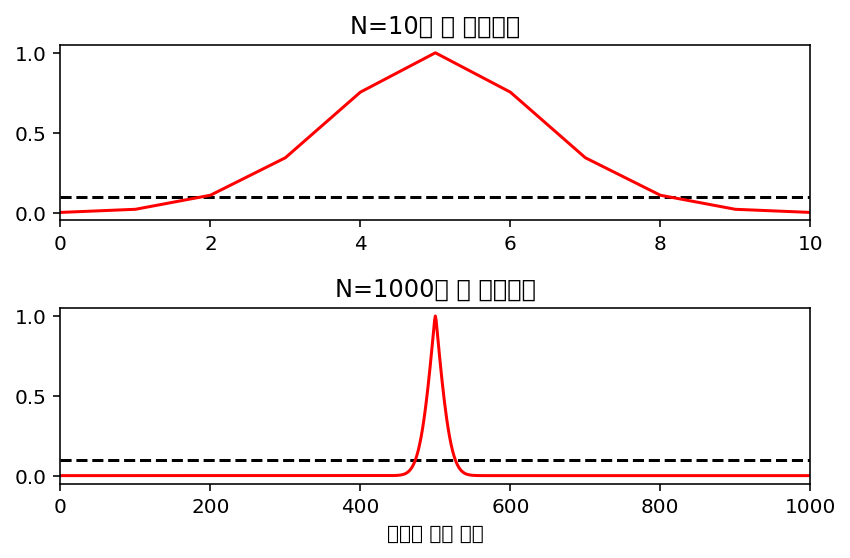

In [17]:
N1 = 10
pvalues1 = np.array([sp.stats.binom_test(n, N1) for n in range(N1 + 1)])
fair_range1, = np.where(pvalues1 > 0.1)
fair_start1, fair_end1 = fair_range1[0], fair_range1[-1]
print("N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때"\
      .format(N1, fair_start1, fair_end1))

N2 = 1000
pvalues2 = np.array([sp.stats.binom_test(n, N2) for n in range(N2 + 1)])
fair_range2, = np.where(pvalues2 > 0.1)
fair_start2, fair_end2 = fair_range2[0], fair_range2[-1]
print("N={}일 때 공정한 경우: 앞면이 나온 횟수가 {}~{}일 때"\
      .format(N2, fair_start2, fair_end2))

plt.subplot(211)
plt.plot(pvalues1, "r-")
plt.hlines(y=0.1, xmin=0, xmax=N1 + 1, ls="--")
plt.xlim(0, N1)
plt.title("N={}일 때 유의확률".format(N1))
plt.subplot(212)
plt.plot(pvalues2, "r-")
plt.hlines(y=0.1, xmin=0, xmax=N2 + 1, ls="--")
plt.xlim(0, N2)
plt.title("N={}일 때 유의확률".format(N2))
plt.xlabel("앞면이 나온 횟수")
plt.tight_layout()
plt.show()

#### 연습문제 9.5.2
- 하나의 레코드(행)이 한 명의 손님을 나타낸다고 가정하자. 열마다 성별(sex), 흡연유무(smoker), 점심/저녁(time) 등을 나타내는 데이터가 있다.

이항검정을 사용하여 다음 문제를 풀어라. 유의수준은 10%다.

여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?
저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [18]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [19]:
tips[tips.sex == "Female"].smoker.value_counts()

No     54
Yes    33
Name: smoker, dtype: int64

In [20]:
sp.stats.binom_test(54, 54 + 33, alternative="greater")

0.015709055116923068

In [22]:
tips[(tips.sex == "Female") & (tips.time == "Dinner")].smoker.value_counts()

No     29
Yes    23
Name: smoker, dtype: int64

In [23]:
sp.stats.binom_test(29, 29 + 23, alternative="greater")

0.2442278346899461

#### 연습문제 9.5.4
- 6면체 주사위를 5번 던졌다. 5번 모두 6이 나왔다면 주사위가 공정하다는 귀무가설의 유의확률은 얼마인가?

In [24]:
sp.stats.chisquare([0, 0, 0, 0, 0, 5])

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

#### 연습문제 9.5.5
- 예를 들어 데이터 사이언스 스쿨 수업을 들었는가의 여부가 나중에 대학원에서 머신러닝 수업의 학점과 상관관계가 있는지를 알기 위해 데이터를 구한 결과가 다음과 같다고 하자.

데이터 사이언스 스쿨 수업을 듣지 않은 경우 즉,  X 가 0이면 A, B, C 학점( Y  값)을 받은 학생의 분포가  4,16,20 이다.
데이터 사이언스 스쿨 수업을 들은 사람의 경우 즉,  X 가 1일 때 A, B, C 학점( Y  값)을 받은 학생의 분포가  23,18,19 다.
이 결과로부터 데이터 사이언스 스쿨 수업을 들었는가의 여부가 머신러닝 수업의 학점과 상관관계가 있다고 말할 수 있는가?

In [25]:
obs = np.array([[4, 16, 20], [23, 18, 19]])
result = sp.stats.chi2_contingency(obs)
print(result[1])

0.00704786570249751


#### 연습문제 9.5.6
- 1반과 2반 학생 들의 성적이 각각 다음과 같다고 가정하자.

- 1반 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점. 평균 74.1점
- 2반 : 80점, 85점, 70점, 80점, 35점, 55점, 80점 . 평균 69.2점
1반의 실력이 2반보다 좋다고 이야기 할 수 있는가?

In [27]:
x1 = [80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80]
x2 = [80, 85, 70, 80, 35, 55, 80]
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=0.623010926550264, pvalue=0.5415458608473267)

In [28]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

#### 연습문제 10.1.1
- 베르누이분포에서 확률값  P(Y=1) 은 0부터 1까지의 값을 가질 수 있다. 각각의 값에 대해 엔트로피를 계산하여 가로축이  P(Y=1) 이고 세로축이  H[Y] 인 그래프를 그려라.

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50644 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53944 missing from current f

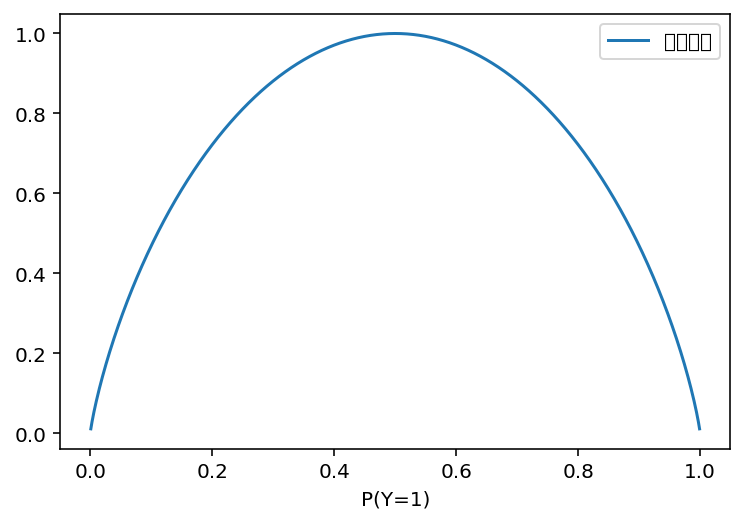

In [30]:
P0 = np.linspace(0.001, 1 - 0.001, 1000)
P1 = 1 - P0
H = - P0 * np.log2(P0) - P1 * np.log2(P1)
plt.plot(P1, H, "-", label="엔트로피")
plt.legend()
plt.xlabel("P(Y=1)")
plt.show()

#### 연습문제 10.1.3
- (1) 데이터가 모두 60개가 있고 그 중  Y=0 인 데이터가 20개,  Y=1 인 데이터가 40개 있는 경우의 엔트로피를 계산하라.

- (2) 데이터가 모두 40개가 있고 그 중  Y=0 인 데이터가 30개,  Y=1 인 데이터가 10개 있는 경우의 엔트로피를 계산하라.

- (3) 데이터가 모두 20개가 있고 그 중  Y=0 인 데이터만 20개 있는 경우의 엔트로피를 계산하라.

In [31]:
p = [0.3, 0.6]
sp.stats.entropy(p, base=2)

0.9182958340544894

In [32]:
p = [0.75, 0.25]
sp.stats.entropy(p, base=2)

0.8112781244591328

In [33]:
p = [0, 1]
sp.stats.entropy(p, base=2)

0.0